# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [10]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [11]:
fifa['Val_Num'] = fifa['Value'].str.strip('€,M,K').astype('float')
fifa['M/K'] = np.where(fifa['Value'].str.endswith('M'),'M',np.where(fifa['Value'].str.endswith('K'),'K',''))
fifa['Zeros'] = np.where(fifa['M/K']=='M',1000000,np.where(fifa['M/K']=='K',1000,fifa['Val_Num'])).astype('int')
fifa['ValueNumeric'] = (fifa['Val_Num']*fifa['Zeros']).astype('int')
fifa.drop(columns = ['Val_Num','M/K','Zeros'], inplace=True)
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [59]:
fifa.rename(columns = {'Preferred Foot':'Preferred_Foot'}, inplace = True)

In [60]:
# Comprobamos acá que efectivamente se haya hecho el cambio del nombre de columna.

fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [61]:
# Your code here:
modelo_fifa = ols('ValueNumeric ~ Position * Preferred_Foot', data = fifa).fit()
sm.stats.anova_lm(modelo_fifa)

,df,sum_sq,mean_sq,F,PR(>F)
Position,26.0,1.649609e+16,6.344651e+14,20.957327,6.868224e-97
Preferred_Foot,1.0,2.341622e+14,2.341622e+14,7.734728,5.422475e-03
Position:Preferred_Foot,26.0,5.152828e+15,1.981857e+14,6.546369,5.153229e-23
Residual,18093.0,5.477500e+17,3.027414e+13,NaN,NaN


In [62]:
print(1 - sm.stats.anova_lm(modelo_fifa)['PR(>F)'][0])
print(1 - sm.stats.anova_lm(modelo_fifa)['PR(>F)'][1])
print(1 - sm.stats.anova_lm(modelo_fifa)['PR(>F)'][2])

1.0
0.9945775251156496
1.0


What is your conclusion from this ANOVA?

#### <font color='brown'>Ho: La media del valor de los jugadores es igual considerando tanto Preferred Foot y Position.</font>
#### <font color='brown'>H1: Al menos hay una media diferente.</font>

#### <font color='brown'>En síntesis, con una confianza cercana del 100% podemos rechazar nuestra Ho, es decir, al menos una de las medias es distinta considerando las variables preferred foot y position.</font>

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [63]:
# Your code here:
model_fifa_nationality = ols('ValueNumeric ~ Nationality', data = fifa).fit()
sm.stats.anova_lm(model_fifa_nationality)

,df,sum_sq,mean_sq,F,PR(>F)
Nationality,163.0,3.281224e+16,2.013021e+14,6.762478,4.840479e-134
Residual,18043.0,5.370951e+17,2.976751e+13,NaN,NaN


In [64]:
1 - sm.stats.anova_lm(model_fifa_nationality)['PR(>F)'][0]

1.0

What is your conclusion from this ANOVA?

#### <font color='brown'>Ho: el promedio del valor de un jugador es igual independiente de su nacionalidad.</font>
#### <font color='brown'>H1: al menos hay un valor promedio distinto.</font>

#### <font color='brown'>Podemos rechazar nuestro Ho con una confianza del 100%, es decir, el valor de un jugador sí se ve afectado por su nacionalidad.</font>

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [65]:
# Your code here:

fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [66]:
fifa.dropna(inplace=True)

In [67]:
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [68]:
# Your code here:
X=sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y=fifa['ValueNumeric']
fifa_model = sm.OLS(y, X).fit()
print(fifa_model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          8.04e-193
Time:                        21:34:11   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

#### <font color='brown'>Dado el F-statistic, podríamos decir que el slope es diferente de 0 y que con una confianza del 100% se rechaza la Ho. Ahora bien, el R-squared nos indica que el modelo captura sólo el 4,8% de la variación en la data.</font>

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [69]:
# Your code here:
X=sm.add_constant(fifa[['Potential']])
y=fifa['ValueNumeric']
potential_model = sm.OLS(y, X).fit()
print(potential_model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:34:13   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

#### <font color='brown'>Dado el F-statistic, podríamos decir que el slope es diferente de 0 y que con una confianza del 100% se rechaza la Ho. Ahora bien, el R-squared nos indica que el modelo captura sólo el 4,8% de la variación en la data.</font>

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

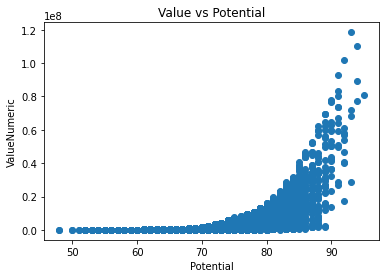

In [70]:
# Your code here:

plt.scatter(fifa['Potential'], fifa['ValueNumeric'])
plt.title('Value vs Potential')
plt.xlabel('Potential')
plt.ylabel('ValueNumeric');

#### <font color='brown'>No se ve que haya una relación lineal, sino más bien exponencial.</font>